# Step by step following the video:
https://youtu.be/Q73ADVZCqSU
## Shared notebook in
https://github.com/mnd-af/src/blob/master/2017/06/04/Uber%20Data%20Analysis.ipynb

This notebook has more cells than the github because of the step by step.

In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [25]:
data = pandas.read_csv('uber-raw-data-apr14.csv')

In [26]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [27]:
# Convert datetime and add some useful columns

In [7]:
# Convert 1 element using pandas to see if pandas understand the timestamp
dt = '4/30/2014 23:22:00'
dt = pandas.to_datetime(dt)
dt

Timestamp('2014-04-30 23:22:00')

In [28]:
# This takes a few minutes to run
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [29]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [16]:
# Get day of month in 1 row in Date/Time field
dt = data['Date/Time'][5000]
dt.day

4

In [40]:
# Get Date of Month function
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [41]:
data.tail()

,Date/Time,Lat,Lon,Base,weekday,hour,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,23,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,23,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,23,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,23,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,2,23,30


## Read CSV file again with parse date (a lot faster than using map)

In [23]:
data1 = pandas.read_csv('uber-raw-data-apr14.csv', parse_dates=['Date/Time'])

In [24]:
data1.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [37]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,2,23


# Analysis
## analyze the DoM

In [65]:
data.dom.head()

0    1
1    1
2    1
3    1
4    1
Name: dom, dtype: int64

In [64]:
data.dom.count()

564516

# Histogram in a nutshell
## https://statistics.laerd.com/statistical-guides/understanding-histograms.php

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

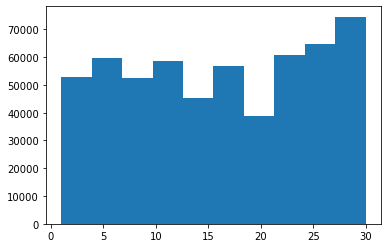

In [43]:
# Histogram with Day of Month (The number of records for on the DOM is on the y-axis)
# Default bin is 10.  bin is too large for this example
hist(data.dom)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

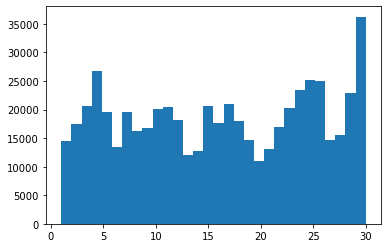

In [44]:
# Changing bin to 30, make it count by day of month
hist(data.dom,bins=30)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

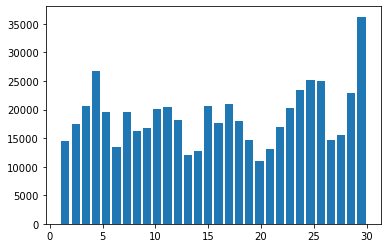

In [76]:
hist(data.dom,bins=30, rwidth=.8)   # Add rwidth (see the bar separated)

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

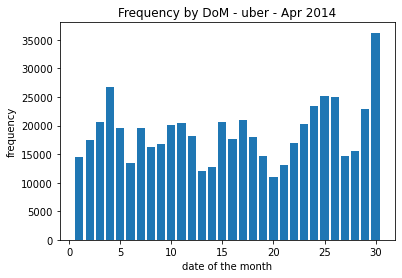

In [45]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

In [47]:
# Counting the number of records by day of month
#for k, rows in data.groupby('dom'):
#    print((k, len(rows)))

def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

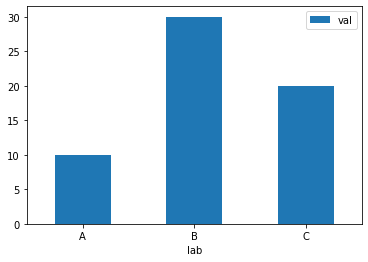

In [85]:
# Basic Bar chart
import pandas as pd
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df
ax = df.plot.bar(x='lab', y='val', rot=0)

<BarContainer object of 30 artists>

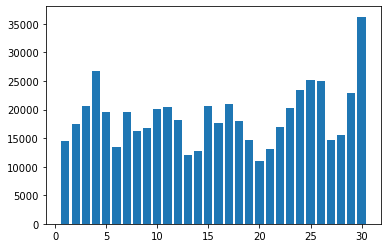

In [48]:
# Draw a bar chart from the groupby count yield the same graph as histogram
bar(range(1, 31), by_date)

In [49]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

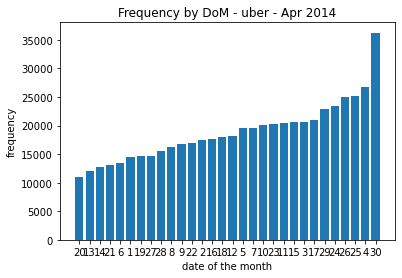

In [50]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')
;

# analyze the hour

In [80]:
data.hour.tail()

564511    23
564512    23
564513    23
564514    23
564515    23
Name: hour, dtype: int64

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

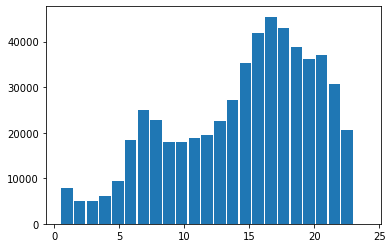

In [81]:
hist(data.hour, bins=24, range=(.5, 24), rwidth=0.9)

# analyze the weekday

(array([ 60861.,  91185., 108631.,  85067.,  90303.,  77218.,  51251.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

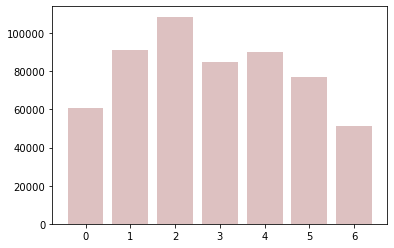

In [92]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split()) # changing the x axis label
# Adding semi colon remove the histogram meta data in output

# cross analysis (hour, dow)

In [95]:
count_rows(data)

564516

In [96]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

In [102]:
data.groupby('weekday hour'.split()).apply(count_rows)

weekday  hour
0        0        518
         1        261
         2        238
         3        571
         4       1021
                 ... 
6        19      2579
         20      2276
         21      2310
         22      1639
         23      1018
Length: 168, dtype: int64

In [101]:
by_cross.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393


<AxesSubplot:xlabel='hour', ylabel='weekday'>

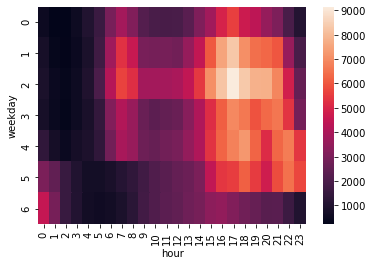

In [97]:
seaborn.heatmap(by_cross)

# by lat and lon

In [107]:
data['Lat'].head()

0    40.7690
1    40.7267
2    40.7316
3    40.7588
4    40.7594
Name: Lat, dtype: float64

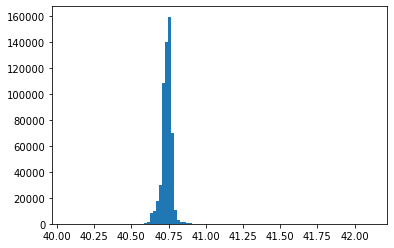

In [110]:
hist(data['Lat'], bins=100);  # See most data is in the range of 40s

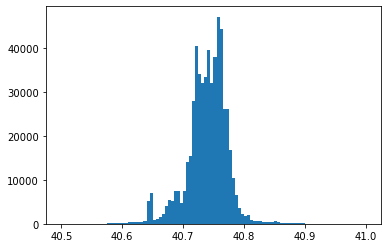

In [112]:
hist(data['Lat'], bins=100, range = (40.5, 41));  # add range to see the scale better

In [116]:
# Look at Lon

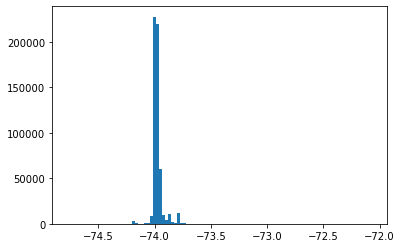

In [117]:
hist(data['Lon'], bins=100);

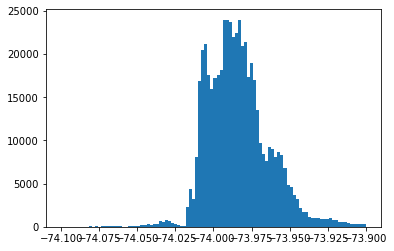

In [118]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9)); # add range to drill down

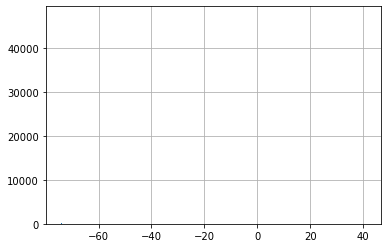

In [121]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9))
hist(data['Lat'], bins=100, range = (40.5, 41));
# see nothing because of scale

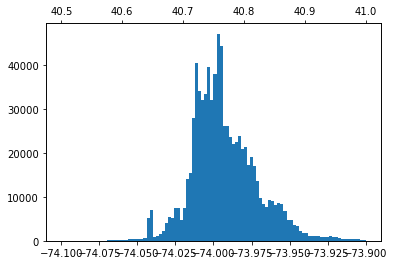

In [123]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9))
twiny()  # add a second x-axis and y-axis to show the graph
# https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.axes.Axes.twiny.html
hist(data['Lat'], bins=100, range = (40.5, 41));
# but can distinguish

''

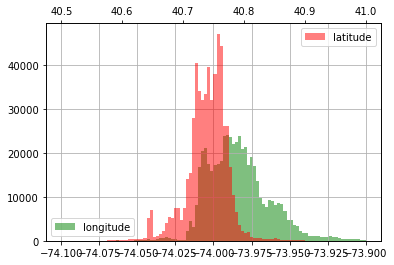

In [126]:
# add color to distinguish the 2
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='lower left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

In [137]:
data['Lat'].head()

0    40.7690
1    40.7267
2    40.7316
3    40.7588
4    40.7594
Name: Lat, dtype: float64

(0.0, 100.0)

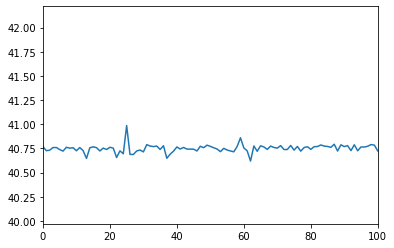

In [128]:
plot(data['Lat'])
xlim(0,100)

(0.0, 100.0)

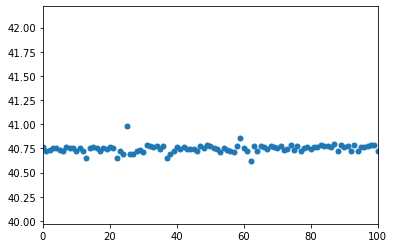

In [135]:
plot(data['Lat'],'.', ms=10) # use dot instead of line like above
xlim(0,100)

(0.0, 100.0)

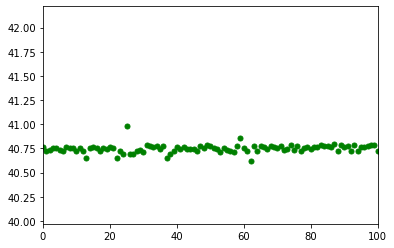

In [132]:
plot(data['Lat'],'.', ms=10, color='green')  # add color

(0.0, 100.0)

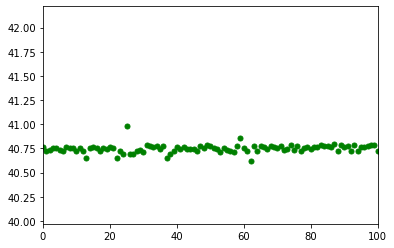

In [133]:
plot(data['Lat'],'.', ms=10, color='green', label='lat') # add label for line (not shown in graph)
xlim(0,100)

(0.0, 100.0)

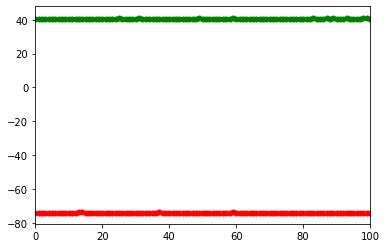

In [136]:
plot(data['Lat'],'.', ms=10, color='green', label='lat')
plot(data['Lon'],'.', ms=10, color='red', label='lon')
xlim(0,100)

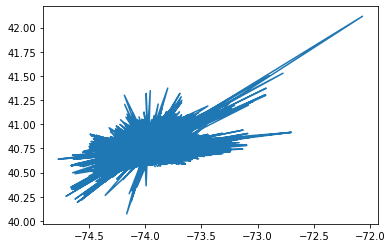

In [138]:
plot(data['Lon'],data['Lat']) # plot by the coordinates

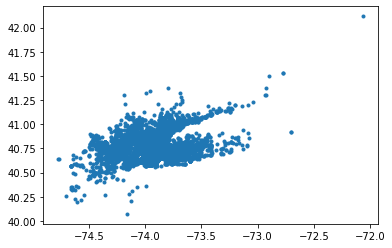

In [139]:
plot(data['Lon'],data['Lat'], '.')  # using dot better for this

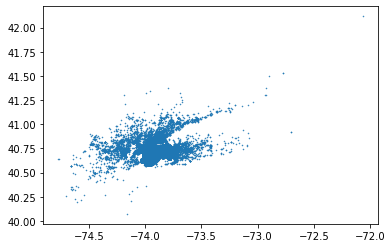

In [142]:
# Plt not easy to understand, zoom in
plot(data['Lon'],data['Lat'], '.', ms=1)

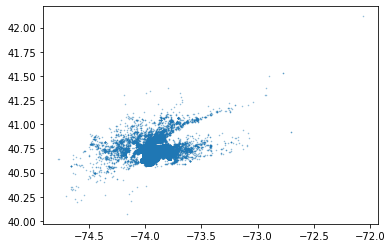

In [143]:
# Plt not easy to understand, zoom in add alpha to see more clearly
plot(data['Lon'],data['Lat'], '.', ms=1, alpha=0.5)

In [ ]:
# The alpha channel is not necessary here, but it can be used to soften colors for more visually appealing plots. In other examples, as we'll see below, the alpha channel is functionally useful as the shaded regions can overlap and alpha allows you to see both. 
# https://matplotlib.org/3.3.4/gallery/recipes/fill_between_alpha.html?highlight=alpha

(-74.2, -73.7)

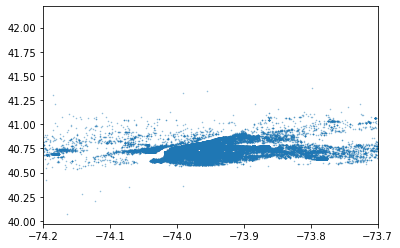

In [145]:
# better, but want to zoom in, change the x-axis using xlim
plot(data['Lon'],data['Lat'], '.', ms=1, alpha=0.5)
xlim(-74.2, -73.7)  # here 

In [146]:
# xlim (x-limit)
# Get or set the x limits of the current axes.
# https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim

(40.7, 41.0)

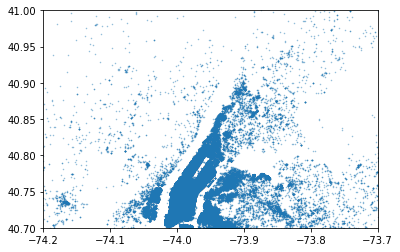

In [148]:
plot(data['Lon'],data['Lat'], '.', ms=1, alpha=0.5)
xlim(-74.2, -73.7)  #  
ylim(40.7, 41)  # new  
# see New York Manhattan here.  Central Park

(40.7, 41.0)

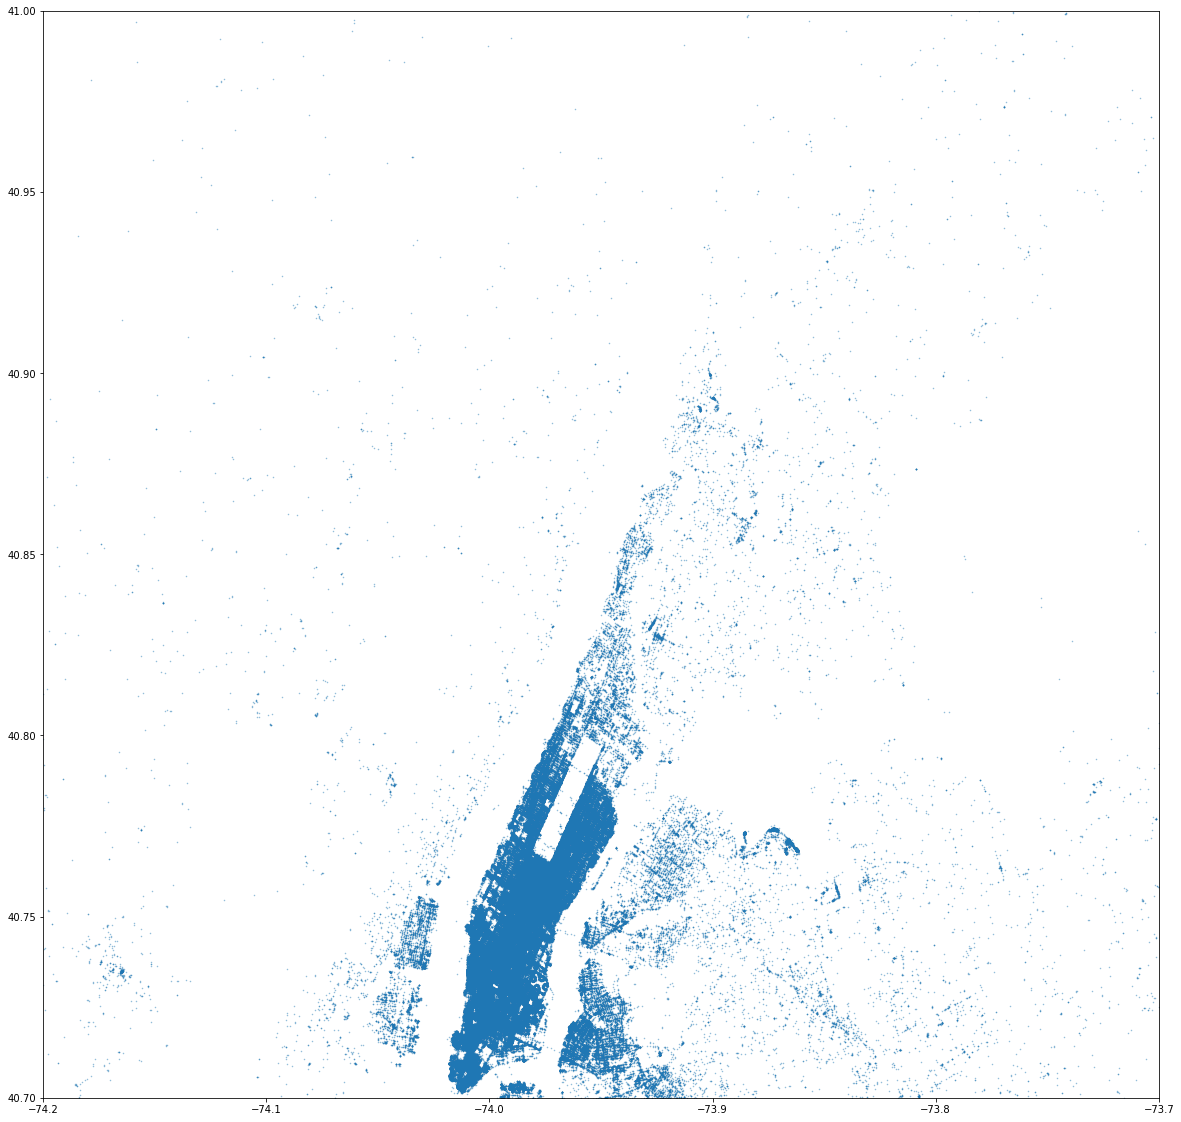

In [125]:
figure(figsize=(20, 20)) # add figure here
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)
# use figure to see it better, larger
# see New York Manhattan here.  Central Park